In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [41]:
loan=pd.read_csv('Fraud_detection.csv') 


In [42]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
loan.shape

(614, 13)

In [44]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [46]:
#checking information about dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


# To check Missing Values

In [47]:
loan.isnull().values.any()

True

In [48]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

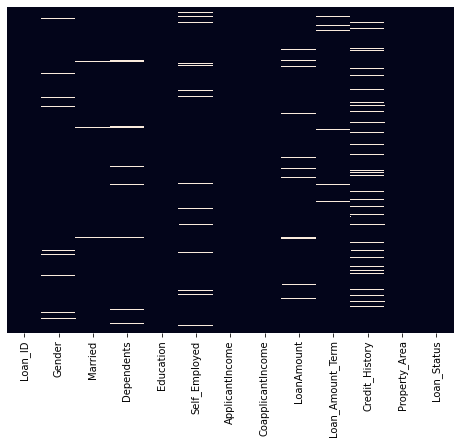

In [49]:
# seeeing missing value via visiulization
plt.figure(figsize=(8,6))
sns.heatmap(loan.isnull(),yticklabels=False,cbar=False)

In [50]:
#imputing the missing value while mode
for col in ['Gender','Married','Dependents','Self_Employed']:
    loan[col].fillna(loan[col].mode()[0],inplace=True)

In [51]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Inputing values in numeric column

In [52]:
loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)
loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mean(),inplace=True)
loan["Credit_History"].fillna(loan["Credit_History"].mean(),inplace=True)


In [53]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploring the Categorical column

In [54]:
for column in loan.columns:
    if loan[column].dtypes==object:
        print(str(column)+ ' : '+str(loan[column].unique()))
        print(loan[column].value_counts())
        print('*******************************************************************')
        print('/n')

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

# For analyzing the data with target that loan_status we have to change into numeric.

In [55]:
loan['Loan_Status']=loan['Loan_Status'].map({'N' : 0, 'Y':1})
loan['Loan_Status'].dtypes

dtype('int64')

In [56]:
loan['Loan_Status'].unique()

array([1, 0], dtype=int64)

# Summary Statistics

In [57]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


# To check Correlation

In [58]:
corr=loan.corr()

In [59]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,1.000000


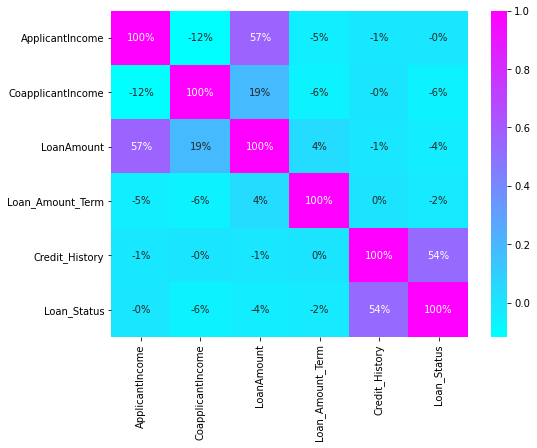

In [60]:
#correlation via heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt='.0%',cmap='cool')

Text(0.5, 1.0, 'correlation with target variable')

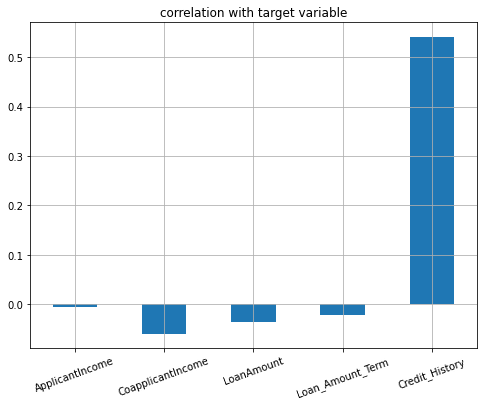

In [61]:
#checking the correlation with target variable
plt.figure(figsize=(8,6))
loan.drop('Loan_Status',axis=1).corrwith(loan['Loan_Status']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

# Data Visualization


# Univariate Analysis

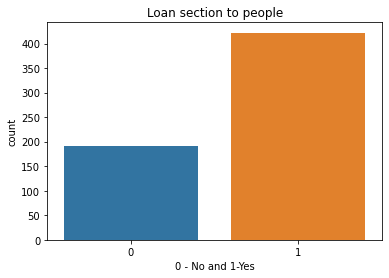

1    422
0    192
Name: Loan_Status, dtype: int64


In [63]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Loan_Status",data=loan)
plt.title("Loan section to people")
plt.xlabel('0 - No and 1-Yes')
plt.ylabel('count')
plt.show()

print(loan.Loan_Status.value_counts())

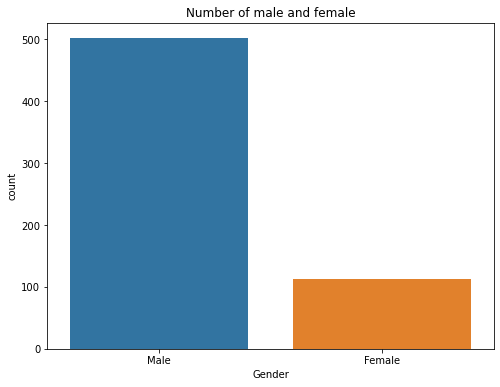

Male      502
Female    112
Name: Gender, dtype: int64


In [65]:
plt.subplots(figsize=(8,6))
sns.countplot(x="Gender",data=loan)
plt.title("Number of male and female")
plt.show()

print(loan.Gender.value_counts())

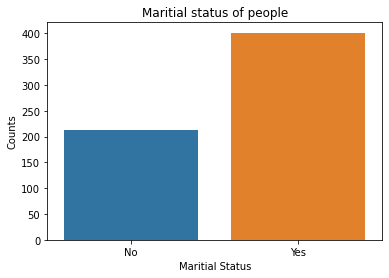

Yes    401
No     213
Name: Married, dtype: int64


In [66]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Married',data=loan)
plt.title('Maritial status of people')
plt.xlabel('Maritial Status')
plt.ylabel('Counts')
plt.show()

print(loan.Married.value_counts())

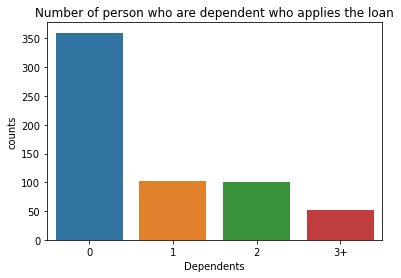

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [68]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Dependents',data=loan)
plt.title('Number of person who are dependent who applies the loan')
plt.xlabel('Dependents')
plt.ylabel('counts')
plt.show()

print(loan.Dependents.value_counts())

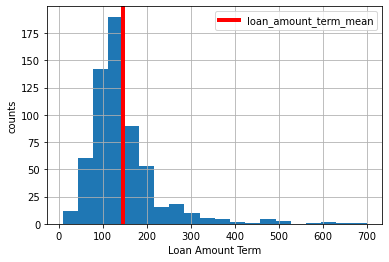

In [73]:
#checking the mean of loan amount
loan_amount=loan['LoanAmount'].hist(bins=20)
mean_val=np.mean(loan['LoanAmount'])
plt.axvline(mean_val,linewidth=4, color='red',label='loan_amount_term_mean')
plt.xlabel('Loan Amount Term')
plt.ylabel('counts')
plt.legend()
plt.show()

# Bivariate Analysis

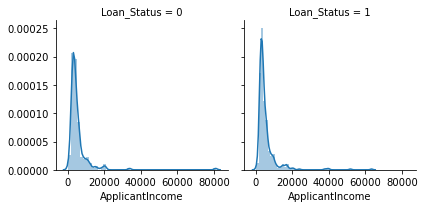

In [74]:
#Exploring applicant income vs loan_status via facegrid
facet=sns.FacetGrid(loan,col='Loan_Status')
facet.map(sns.distplot,'ApplicantIncome')
plt.show()

# Gender vs Loan status

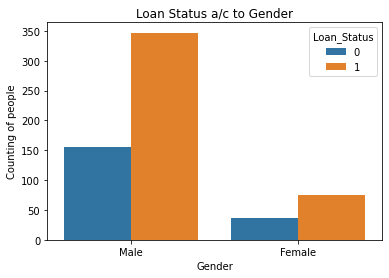

Gender  Loan_Status
Female  1               75
        0               37
Male    1              347
        0              155
Name: Loan_Status, dtype: int64


In [77]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan)
plt.title('Loan Status a/c to Gender')
plt.xlabel('Gender')
plt.ylabel('Counting of people')
plt.show()

print(loan.groupby('Gender')['Loan_Status'].value_counts())

# Education vs loan status

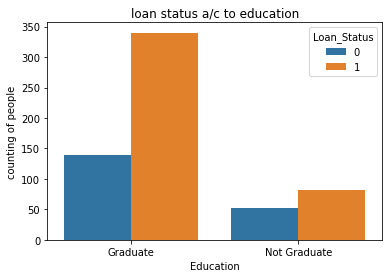

Education     Loan_Status
Graduate      1              340
              0              140
Not Graduate  1               82
              0               52
Name: Loan_Status, dtype: int64


In [78]:
sns.countplot(x="Education",hue="Loan_Status",data=loan)
plt.title('loan status a/c to education')
plt.xlabel('Education')
plt.ylabel('counting of people')
plt.show()

print(loan.groupby('Education')['Loan_Status'].value_counts())

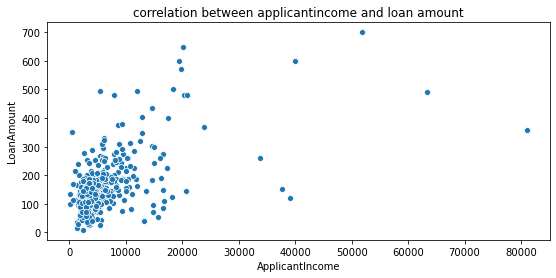

In [81]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=loan)
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('correlation between applicantincome and loan amount')
plt.show()

# Checking Skewness

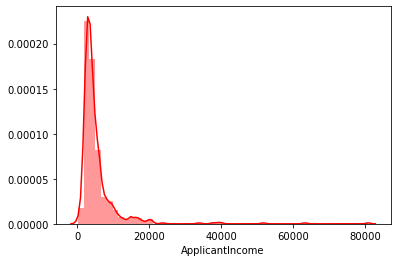

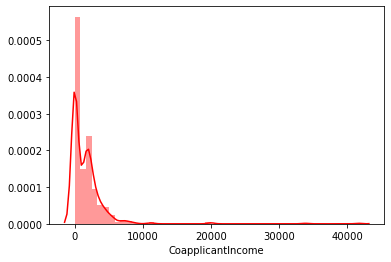

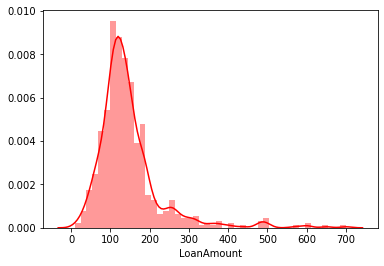

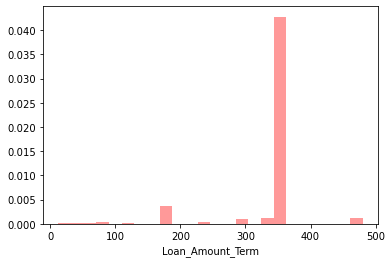

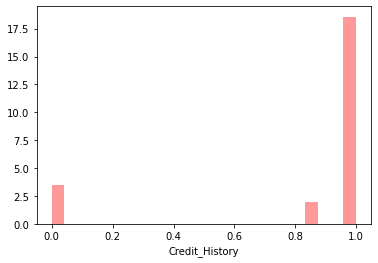

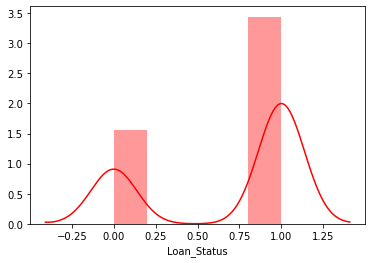

In [82]:
for col in loan.describe().columns:
    sns.distplot(loan[col],color='r')
    plt.show()

In [83]:
loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

In [84]:
loan.skew()
for col in loan.skew().index:
    if col in loan.describe().columns:
        if loan[col].skew()>0.55:
            loan[col]=np.sqrt(loan[col])
        if loan[col].skew()<-0.55:
            loan[col]=np.cbrt(loan[col])
            

# Changing Categorical Variable into numeric

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in loan.columns:
    if loan[column].dtypes==np.number:
        continue
    loan[column]=le.fit_transform(loan[column])

In [86]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2,1.0
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,7.113787,1.0,2,1.0
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,7.113787,1.0,2,1.0


# Plotting outliers

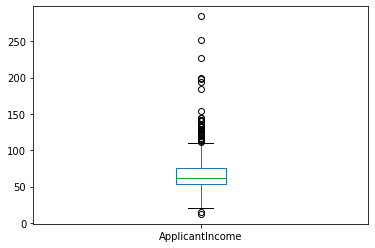

In [87]:
loan["ApplicantIncome"].plot.box()

# Removing outliers

In [89]:
from scipy.stats import zscore
z=np.abs(zscore(loan))

In [90]:
threshold=3
print(np.where(z>3))


(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417, 443, 487,
       495, 497, 506, 523, 546, 561, 575, 581, 585, 600, 604], dtype=int32), array([9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8, 8, 7,
       6, 7, 6, 8, 9, 9, 8, 8, 9, 8, 9, 7, 9, 7, 8], dtype=int32))


In [91]:
new_loan=loan[(z<3).all(axis=1)]
new_loan.shape

(580, 13)

In [93]:
loan.shape

(614, 13)

# all outliers are removed

# Model Traning

In [94]:
new_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,76.478755,0.000000,12.100089,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,67.697858,38.832976,11.313708,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,54.772256,0.000000,8.124038,7.113787,1.0,2,1.0
3,3,1,1,0,1,0,50.823223,48.559242,10.954451,7.113787,1.0,2,1.0
4,4,1,0,0,0,0,77.459667,0.000000,11.874342,7.113787,1.0,2,1.0


In [95]:
x=new_loan.drop(columns=['Loan_Status'],axis=1)
y=new_loan["Loan_Status"]

In [96]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [100]:
#importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#import boosting library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
 #import error metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [104]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy score of ",m,"is:")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("***********************************************************************************************************")
    print('/n')

Accuracy score of  LogisticRegression() is:
0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116

***********************************************************************************************************
/n
Accuracy score of  GaussianNB() is:
0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116

*******************************************************************************

# find best parameters

In [106]:
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()
clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [107]:
lg=LogisticRegression(C=1,random_state=42)
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8620689655172413
[[21 15]
 [ 1 79]]
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116



In [109]:
#cvscore for logisticregression
cvscore=cross_val_score(lg,x,y,cv=5,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('std:',cvscore.std())

[0.81034483 0.79310345 0.78448276 0.86206897 0.8362069 ]
mean: 0.8172413793103448
std: 0.02853956096077041


In [110]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel' :('linear','rbf','poly'),'C':[1,10],'random_state':range(42,60)}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear', 'random_state': 42}


In [111]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

0.8620689655172413
              precision    recall  f1-score   support

         0.0       0.95      0.58      0.72        36
         1.0       0.84      0.99      0.91        80

    accuracy                           0.86       116
   macro avg       0.90      0.79      0.82       116
weighted avg       0.88      0.86      0.85       116

[[21 15]
 [ 1 79]]


In [112]:
cvscore=cross_val_score(svc,x,y,cv=5,scoring='accuracy')
print(cvscore)
print('mean:',cvscore.mean())
print('std:',cvscore.std())

[0.80172414 0.79310345 0.78448276 0.85344828 0.8362069 ]
mean: 0.8137931034482758
std: 0.026486709475408987


# Among all this logisticregression perform well so i am  are saving this

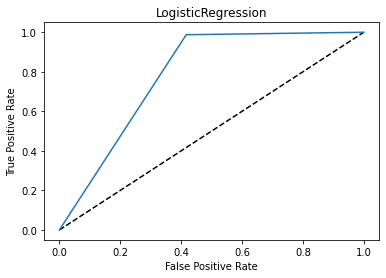

0.7854166666666667


In [114]:
#auc-roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
predlg_proba=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,predlg)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression')
plt.show()


auc_score=roc_auc_score(y_test,predlg)
print(auc_score)

In [115]:
import pickle 

In [116]:
filename="Fraud_detection.csv"
pickle.dump(lg,open(filename,'wb'))

In [117]:
a=np.array(y_test)


In [118]:
predicted=np.array(lg.predict(x_test))

In [119]:
df_com=pd.DataFrame({'origianl':a,'predicted':predicted},index=range(len(a)))

In [120]:
df_com

,origianl,predicted
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
111,1.0,1.0
112,1.0,1.0
113,0.0,1.0
114,1.0,0.0
